In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.ensemble import IsolationForest


from sklearn.metrics import auc, roc_auc_score, roc_curve, f1_score

from sklearn.metrics import confusion_matrix, classification_report


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/final_data_2.csv')

In [ ]:
target = 'STATUS'
features = ['FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
          'AMT_INCOME_TOTAL', 'NAME_EDUCATION_TYPE', 'STABLE_WORK',
          'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL', 'CNT_FAM_MEMBERS',
          'FEMALE', 'MALE', 'Commercial associate', 'Pensioner',
          'State servant', 'Student', 'Working', 'Civil marriage', 'Married',
          'Separated', 'Single / not married', 'Widow', 'Co-op apartment',
          'House / apartment', 'Municipal apartment', 'Office apartment',
          'Rented apartment', 'With parents', 'AGE']

In [ ]:
x = df[features].to_numpy()
y = df[target].to_numpy()

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_norm = scaler.fit_transform(x)
x_norm.shape

(9579, 28)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_norm, y, test_size=0.2, random_state=10)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((7663, 28), (1916, 28), (7663,), (1916,))

In [ ]:
from sklearn.ensemble import IsolationForest
ifc=IsolationForest(max_samples=len(x_train),
                    contamination=0.04,random_state=1)
ifc.fit(x_train)
scores_pred = ifc.decision_function(x_train)
y_pred = ifc.predict(x_test)


y_pred[y_pred == 1] = 0
y_pred[y_pred == -1] = 1

n_errors = (y_pred != y_test).sum()

In [ ]:
print(n_errors)

157


The F1-Score is 0.5140724371493602
The Roc-Auc Score is 0.5139942814919523


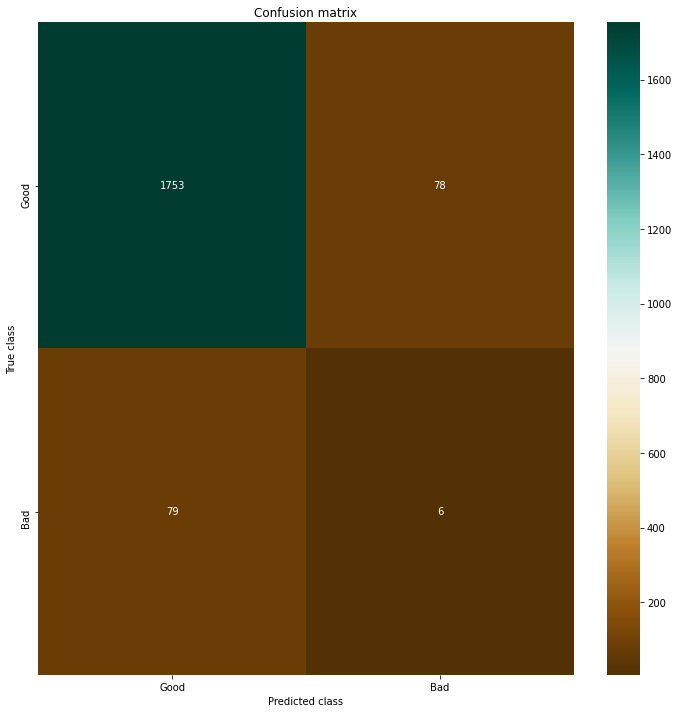

              precision    recall  f1-score   support

           0       0.96      0.96      0.96      1831
           1       0.07      0.07      0.07        85

    accuracy                           0.92      1916
   macro avg       0.51      0.51      0.51      1916
weighted avg       0.92      0.92      0.92      1916



<Figure size 360x360 with 0 Axes>

In [ ]:
from sklearn.metrics import confusion_matrix

f1= f1_score(y_test,y_pred, average="macro")
print("The F1-Score is {}".format(f1))
roc_auc = roc_auc_score(y_test, y_pred)
print("The Roc-Auc Score is {}".format(roc_auc))


labels = ['Good', 'Bad']
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(12, 12))
sns.heatmap(conf_matrix, xticklabels=labels, yticklabels=labels, annot=True, fmt="d", cmap="BrBG")
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()


plt.figure(figsize=(5, 5))
print(classification_report(y_test, y_pred))